# EDA - Datos TCA


### Librerías

In [73]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#from sklearn.preprocessing import category_encoders
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
#from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
#sns.set_theme(style="darkgrid")

In [2]:
pip uninstall matplotlib

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install matplotlib

In [3]:
pip install numpy==1.23.3 --force-reinstall

  Using cached numpy-1.23.3-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Owner\\anaconda3\\Lib\\site-packages\\~=mpy.libs\\libscipy_openblas64_-caad452230ae4ddb57899b8b3a33c55c.dll'
Consider using the `--user` option or check the permissions.



In [74]:
pip install --upgrade matplotlib


^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
pd.set_option('display.max_columns', None)

### Conexión a SQL

In [75]:
host = "localhost"  # e.g., 'localhost' or IP address
port = "5432"       # default PostgreSQL port
database = "postgres"
user = "postgres"
password = "equipo3"


In [76]:
engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}")
#connection = engine.connect()


### Creación de dataframes

In [77]:
df_ocup = pd.read_sql(f"SELECT * FROM ocupaciones", engine)


threshold_zero = 0.9

df_ocup = df_ocup.loc[:, (df_ocup == 0).mean() < threshold_zero]
# Replace empty strings with NaN
df_ocup = df_ocup.replace(r"^\s*$", np.nan, regex=True)



#### Tabla Reservaciones

Contiene detalles de diferentes reservaciones en un periodo de tiempo.

In [78]:
df_resv = pd.read_sql(f"SELECT * FROM reservaciones", engine, index_col='id_reserva')
threshold_zero = 0.9

#df_resv = df_resv.loc[:, (df_resv == 0).mean() < threshold_zero]
# Replace empty strings with NaN
df_resv = df_resv.replace(r"^\s*$", np.nan, regex=True)
df_resv.head()

,fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,aa_h_num_men,h_num_noc,aa_h_num_noc,h_tot_hab,aa_h_tot_hab,id_programa,id_paquete,id_segmento_comp,id_agencia,id_empresa,id_tipo_habitacion,id_canal,h_fec_lld,h_fec_lld_ok,h_fec_lld_okt,h_fec_reg_ok,h_fec_reg_okt,h_fec_sda_ok,h_fec_sda_okt,id_pais_origen,cliente_disp,aa_cliente_disp,reservacion,aa_reservacion,id_estatus_reservaciones,h_edo,h_nom,h_tfa_total,aa_h_tfa_total,moneda_cve,h_ult_cam_fec_ok,h_ult_cam_fec_okt
id_reserva,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2019-08-16 00:00:00.000,20190816,2019-08-16,2019-08-16 00:00:00.000,2,0,2,0,0,0,3,0,1,0,1,1,14,112,1,25,10,20191107.0,2019-11-07,2019-11-07 00:00:00.000,2019-08-16,2019-08-16 00:00:00.000,2019-11-10,2019-11-10 00:00:00.000,157,2,0,1,0,9,EMX,"QUIROZ, SOFIA",2659.98,0.0,1,2019-11-10,2019-11-10 00:00:00.000
1,2019-10-22 00:00:00.000,20191022,2019-10-22,2019-10-22 00:00:00.000,4,0,4,0,0,0,4,0,1,0,1,2,14,112,1,25,10,20191201.0,2019-12-01,2019-12-01 00:00:00.000,2019-10-22,2019-10-22 00:00:00.000,2019-12-05,2019-12-05 00:00:00.000,157,4,0,1,0,9,EGT,"JIMENEZ, VALENTIN",1764.00,0.0,1,2019-12-05,2019-12-05 00:00:00.000
2,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,2,0,2,0,0,0,4,0,1,0,1,1,14,112,1,23,10,20191201.0,2019-12-01,2019-12-01 00:00:00.000,2019-10-28,2019-10-28 00:00:00.000,2019-12-05,2019-12-05 00:00:00.000,157,2,0,1,0,9,EMC,"GALLEGOS, JORGE ROBERTO",2660.04,0.0,1,2019-12-05,2019-12-05 00:00:00.000
3,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,4,0,3,0,0,0,3,0,1,0,1,2,14,112,1,24,10,20191208.0,2019-12-08,2019-12-08 00:00:00.000,2019-10-28,2019-10-28 00:00:00.000,2019-12-11,2019-12-11 00:00:00.000,157,3,0,1,0,9,EGT,"PEREA, VICTOR HUGO",1995.03,0.0,1,2019-12-11,2019-12-11 00:00:00.000
4,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,2,0,2,0,0,0,4,0,1,0,1,1,5,14,1,4,13,20191208.0,2019-12-08,2019-12-08 00:00:00.000,2019-12-08,2019-12-08 00:00:00.000,2019-12-12,2019-12-12 00:00:00.000,157,2,0,1,0,9,EMX,"TREJO GALVAN, RAMON",13369.92,0.0,1,2019-12-12,2019-12-12 00:00:00.000


In [80]:
def standardize_date(date_column):
    # Convert column to string to handle different formats
    date_column = date_column.astype(str)
    
    # Convert to datetime: auto-parse for common formats
    date_column = pd.to_datetime(date_column, format=None, errors='coerce')
    
    # Format the column to remove the time part
    return date_column.dt.strftime('%Y-%m-%d')


In [81]:
# Apply the standardization function
df_resv['fecha_hoy'] = standardize_date(df_resv['fecha_hoy'])
df_resv['h_res_fec'] = standardize_date(df_resv['h_res_fec'])
df_resv['h_res_fec_ok'] = standardize_date(df_resv['h_res_fec_ok'])
df_resv['h_fec_lld_ok'] = standardize_date(df_resv['h_fec_lld_ok'])
df_resv['h_fec_reg_ok'] = standardize_date(df_resv['h_res_fec'])
df_resv['h_fec_sda_ok'] = standardize_date(df_resv['h_res_fec_ok'])
df_resv['h_ult_cam_fec_ok'] = standardize_date(df_resv['h_ult_cam_fec_ok'])
df_resv = df_resv.drop(columns=['h_res_fec_okt','h_fec_lld_okt',
                                'h_fec_reg_okt','h_fec_sda_okt',
                               'h_ult_cam_fec_okt'])

df_resv['h_fec_lld'] = df_resv['h_fec_lld'].fillna(0)
df_resv['h_fec_lld'] = df_resv['h_fec_lld'].astype(int).astype(str)

# Step 2: Convert to datetime format
df_resv['h_fec_lld'] = pd.to_datetime(df_resv['h_fec_lld'], format='%Y%m%d', errors='coerce')

# List of columns to convert
date_columns = ['h_res_fec', 'h_fec_sda_ok', 'h_ult_cam_fec_ok', 'fecha_hoy']

# Convert columns to datetime format
for col in date_columns:
    df_resv[col] = pd.to_datetime(df_resv[col], errors='coerce')

In [82]:
df_resv.head()

,fecha_hoy,h_res_fec,h_res_fec_ok,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,aa_h_num_men,h_num_noc,aa_h_num_noc,h_tot_hab,aa_h_tot_hab,id_programa,id_paquete,id_segmento_comp,id_agencia,id_empresa,id_tipo_habitacion,id_canal,h_fec_lld,h_fec_lld_ok,h_fec_reg_ok,h_fec_sda_ok,id_pais_origen,cliente_disp,aa_cliente_disp,reservacion,aa_reservacion,id_estatus_reservaciones,h_edo,h_nom,h_tfa_total,aa_h_tfa_total,moneda_cve,h_ult_cam_fec_ok
id_reserva,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2019-08-16,2019-08-16,2019-08-16,2,0,2,0,0,0,3,0,1,0,1,1,14,112,1,25,10,2019-11-07,2019-11-07,2019-08-16,2019-08-16,157,2,0,1,0,9,EMX,"QUIROZ, SOFIA",2659.98,0.0,1,2019-11-10
1,2019-10-22,2019-10-22,2019-10-22,4,0,4,0,0,0,4,0,1,0,1,2,14,112,1,25,10,2019-12-01,2019-12-01,2019-10-22,2019-10-22,157,4,0,1,0,9,EGT,"JIMENEZ, VALENTIN",1764.00,0.0,1,2019-12-05
2,2019-10-28,2019-10-28,2019-10-28,2,0,2,0,0,0,4,0,1,0,1,1,14,112,1,23,10,2019-12-01,2019-12-01,2019-10-28,2019-10-28,157,2,0,1,0,9,EMC,"GALLEGOS, JORGE ROBERTO",2660.04,0.0,1,2019-12-05
3,2019-10-28,2019-10-28,2019-10-28,4,0,3,0,0,0,3,0,1,0,1,2,14,112,1,24,10,2019-12-08,2019-12-08,2019-10-28,2019-10-28,157,3,0,1,0,9,EGT,"PEREA, VICTOR HUGO",1995.03,0.0,1,2019-12-11
4,2019-10-28,2019-10-28,2019-10-28,2,0,2,0,0,0,4,0,1,0,1,1,5,14,1,4,13,2019-12-08,2019-12-08,2019-10-28,2019-10-28,157,2,0,1,0,9,EMX,"TREJO GALVAN, RAMON",13369.92,0.0,1,2019-12-12


In [83]:
# Function to choose the original if changes were made
def original_if_changed(orig, changed):
    return changed if changed != 0 else orig

# Create new columns by combining original and changed values
for col in ['h_num_per', 'h_num_adu', 'h_num_men', 'h_num_noc', 'h_tot_hab','h_tfa_total','cliente_disp']:
    df_resv[f'{col}'] = df_resv.apply(lambda x: original_if_changed(x[col], x[f'aa_{col}']), axis=1)

# Display the updated DataFrame
#df_resv[['h_num_per', 'h_num_adu', 'h_num_men', 'h_num_noc', 'h_tot_hab']]

In [84]:
reservaciones_por_estatus = df_resv.groupby(['id_estatus_reservaciones', 'reservacion']).size().unstack(fill_value=0)

# Renombrar columnas para mayor claridad
reservaciones_por_estatus.columns = ['No Reservaciones (0)', 'Sí Reservaciones (1)']

# Mostrar el resultado
print(reservaciones_por_estatus)



                          No Reservaciones (0)  Sí Reservaciones (1)
id_estatus_reservaciones                                            
1                                         8100                  9058
2                                        16561                 16740
3                                          927                   927
4                                          293                   293
5                                         9335                  9545
7                                            1                    23
8                                           63                    67
9                                        65523                 65546


In [12]:
df_resv.head()

,fecha_hoy,h_res_fec,h_res_fec_ok,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,aa_h_num_men,h_num_noc,aa_h_num_noc,h_tot_hab,aa_h_tot_hab,id_programa,id_paquete,id_segmento_comp,id_agencia,id_empresa,id_tipo_habitacion,id_canal,h_fec_lld,h_fec_lld_ok,h_fec_reg_ok,h_fec_sda_ok,id_pais_origen,cliente_disp,aa_cliente_disp,reservacion,aa_reservacion,id_estatus_reservaciones,h_edo,h_nom,h_tfa_total,aa_h_tfa_total,moneda_cve,h_ult_cam_fec_ok
id_reserva,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2019-08-16,2019-08-16,2019-08-16,2,0,2,0,0,0,3,0,1,0,1,1,14,112,1,25,10,2019-11-07,2019-11-07,2019-08-16,2019-08-16,157,2,0,1,0,9,EMX,"QUIROZ, SOFIA",2659.98,0.0,1,2019-11-10
1,2019-10-22,2019-10-22,2019-10-22,4,0,4,0,0,0,4,0,1,0,1,2,14,112,1,25,10,2019-12-01,2019-12-01,2019-10-22,2019-10-22,157,4,0,1,0,9,EGT,"JIMENEZ, VALENTIN",1764.00,0.0,1,2019-12-05
2,2019-10-28,2019-10-28,2019-10-28,2,0,2,0,0,0,4,0,1,0,1,1,14,112,1,23,10,2019-12-01,2019-12-01,2019-10-28,2019-10-28,157,2,0,1,0,9,EMC,"GALLEGOS, JORGE ROBERTO",2660.04,0.0,1,2019-12-05
3,2019-10-28,2019-10-28,2019-10-28,4,0,3,0,0,0,3,0,1,0,1,2,14,112,1,24,10,2019-12-08,2019-12-08,2019-10-28,2019-10-28,157,3,0,1,0,9,EGT,"PEREA, VICTOR HUGO",1995.03,0.0,1,2019-12-11
4,2019-10-28,2019-10-28,2019-10-28,2,0,2,0,0,0,4,0,1,0,1,1,5,14,1,4,13,2019-12-08,2019-12-08,2019-10-28,2019-10-28,157,2,0,1,0,9,EMX,"TREJO GALVAN, RAMON",13369.92,0.0,1,2019-12-12


In [13]:
df_resv.tail()

,fecha_hoy,h_res_fec,h_res_fec_ok,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,aa_h_num_men,h_num_noc,aa_h_num_noc,h_tot_hab,aa_h_tot_hab,id_programa,id_paquete,id_segmento_comp,id_agencia,id_empresa,id_tipo_habitacion,id_canal,h_fec_lld,h_fec_lld_ok,h_fec_reg_ok,h_fec_sda_ok,id_pais_origen,cliente_disp,aa_cliente_disp,reservacion,aa_reservacion,id_estatus_reservaciones,h_edo,h_nom,h_tfa_total,aa_h_tfa_total,moneda_cve,h_ult_cam_fec_ok
id_reserva,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
202997,2020-04-10,2019-04-10,2019-04-10,2,2,2,2,0,0,3,3,1,1,1,2,14,112,1,19,1,2019-04-10,2019-04-10,2019-04-10,2019-04-10,0,2,2,0,1,2,EMC,"VENEGAS, JOSE",2659.95,2659.95,1,2019-04-10
202998,2020-06-17,2019-06-17,2019-06-17,2,2,2,2,0,0,0,0,1,1,1,1,14,112,1,13,1,2019-06-17,2019-06-17,2019-06-17,2019-06-17,0,2,2,0,1,9,EGR,"MEJINEZ, ALFREDO",171.00,171.00,1,2019-06-17
202999,2020-05-30,2019-05-30,2019-05-30,3,3,2,2,0,0,3,3,1,1,1,2,14,112,1,17,1,2019-05-30,2019-05-30,2019-05-30,2019-05-30,0,2,2,0,1,9,EMC,"VELAZQUEZ, JUAN JOSE",2659.98,2659.98,1,2019-06-02
203000,2020-08-10,2019-08-10,2019-08-10,2,2,2,2,0,0,2,2,1,1,1,1,5,14,1,6,1,2019-08-10,2019-08-10,2019-08-10,2019-08-10,0,2,2,0,1,9,EMC,"MARTINEZ, RAIMUNDO",7900.96,7900.96,1,2019-08-12
203001,2020-02-24,2019-02-24,2019-02-24,2,2,2,2,0,0,4,4,1,1,1,2,14,112,1,25,1,2019-02-24,2019-02-24,2019-02-24,2019-02-24,0,2,2,0,1,9,EMC,"ROJAS, VALENTIN",2212.00,2212.00,1,2019-02-28


Diferentes columnas contienen la fecha u hora, así como repiten datos.

In [85]:
df_resv = df_resv.drop(columns=['h_nom','h_edo','aa_reservacion','aa_h_num_per','aa_h_num_adu','aa_h_num_men','aa_h_num_noc','aa_h_tot_hab','aa_h_tfa_total','aa_cliente_disp'])


df_resv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203002 entries, 0 to 203001
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   fecha_hoy                 203002 non-null  datetime64[ns]
 1   h_res_fec                 203002 non-null  datetime64[ns]
 2   h_res_fec_ok              203002 non-null  object        
 3   h_num_per                 203002 non-null  int64         
 4   h_num_adu                 203002 non-null  int64         
 5   h_num_men                 203002 non-null  int64         
 6   h_num_noc                 203002 non-null  int64         
 7   h_tot_hab                 203002 non-null  int64         
 8   id_programa               203002 non-null  int64         
 9   id_paquete                203002 non-null  int64         
 10  id_segmento_comp          203002 non-null  int64         
 11  id_agencia                203002 non-null  int64         
 12  id_empr

## Descripción

In [15]:
df_resv.describe()

,fecha_hoy,h_res_fec,h_num_per,h_num_adu,h_num_men,h_num_noc,h_tot_hab,id_programa,id_paquete,id_segmento_comp,id_agencia,id_empresa,id_tipo_habitacion,id_canal,h_fec_lld,h_fec_sda_ok,id_pais_origen,cliente_disp,reservacion,id_estatus_reservaciones,h_tfa_total,moneda_cve,h_ult_cam_fec_ok
count,203002,203002,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.0,203002.000000,203002.000000,203000,203002,203002.000000,203002.000000,203002.000000,203002.000000,2.030020e+05,203002.0,203002
mean,2020-02-09 22:16:54.161436928,2019-08-12 06:42:02.386971392,2.356415,2.174402,0.067842,3.336071,1.004167,0.997576,1.417139,13.205057,72.992059,1.0,13.722382,3.516029,2019-11-04 20:45:56.429556736,2019-08-12 06:42:02.386971392,156.597275,2.174402,0.503438,6.733407,8.146097e+03,1.0,2019-09-14 21:58:27.996965888
min,2019-01-02 00:00:00,2019-01-02 00:00:00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,2019-02-05 00:00:00,2019-01-02 00:00:00,0.000000,1.000000,0.000000,1.000000,-3.091000e+04,1.0,2000-01-01 00:00:00
25%,2019-07-19 00:00:00,2019-04-10 00:00:00,2.000000,2.000000,0.000000,2.000000,1.000000,1.000000,1.000000,11.000000,33.000000,1.0,4.000000,1.000000,2019-06-16 00:00:00,2019-04-10 00:00:00,157.000000,2.000000,0.000000,3.000000,4.824000e+03,1.0,2019-06-09 00:00:00
50%,2020-02-22 00:00:00,2019-07-19 00:00:00,2.000000,2.000000,0.000000,3.000000,1.000000,1.000000,1.000000,16.000000,89.000000,1.0,17.000000,4.000000,2019-10-18 00:00:00,2019-07-19 00:00:00,157.000000,2.000000,1.000000,9.000000,7.558120e+03,1.0,2019-10-04 00:00:00
75%,2020-07-17 00:00:00,2019-12-27 00:00:00,2.000000,2.000000,0.000000,4.000000,1.000000,1.000000,2.000000,17.000000,99.000000,1.0,19.000000,4.000000,2020-02-24 00:00:00,2019-12-27 00:00:00,157.000000,2.000000,1.000000,9.000000,1.073327e+04,1.0,2020-01-25 00:00:00
max,2021-04-04 00:00:00,2020-04-30 00:00:00,32.000000,15.000000,15.000000,687.000000,6.000000,1.000000,5.000000,19.000000,132.000000,1.0,27.000000,13.000000,2021-12-02 00:00:00,2020-04-30 00:00:00,232.000000,15.000000,1.000000,9.000000,1.033056e+06,1.0,2020-07-13 00:00:00
std,NaN,NaN,0.985527,0.737840,0.371136,3.280470,0.115038,0.049171,0.503859,4.869281,37.254861,0.0,7.646870,2.984189,NaN,NaN,10.558056,0.737840,0.499989,3.193774,7.113891e+03,0.0,NaN


In [16]:
df_resv.head(10)

,fecha_hoy,h_res_fec,h_res_fec_ok,h_num_per,h_num_adu,h_num_men,h_num_noc,h_tot_hab,id_programa,id_paquete,id_segmento_comp,id_agencia,id_empresa,id_tipo_habitacion,id_canal,h_fec_lld,h_fec_lld_ok,h_fec_reg_ok,h_fec_sda_ok,id_pais_origen,cliente_disp,reservacion,id_estatus_reservaciones,h_tfa_total,moneda_cve,h_ult_cam_fec_ok
id_reserva,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2019-08-16,2019-08-16,2019-08-16,2,2,0,3,1,1,1,14,112,1,25,10,2019-11-07,2019-11-07,2019-08-16,2019-08-16,157,2,1,9,2659.98,1,2019-11-10
1,2019-10-22,2019-10-22,2019-10-22,4,4,0,4,1,1,2,14,112,1,25,10,2019-12-01,2019-12-01,2019-10-22,2019-10-22,157,4,1,9,1764.00,1,2019-12-05
2,2019-10-28,2019-10-28,2019-10-28,2,2,0,4,1,1,1,14,112,1,23,10,2019-12-01,2019-12-01,2019-10-28,2019-10-28,157,2,1,9,2660.04,1,2019-12-05
3,2019-10-28,2019-10-28,2019-10-28,4,3,0,3,1,1,2,14,112,1,24,10,2019-12-08,2019-12-08,2019-10-28,2019-10-28,157,3,1,9,1995.03,1,2019-12-11
4,2019-10-28,2019-10-28,2019-10-28,2,2,0,4,1,1,1,5,14,1,4,13,2019-12-08,2019-12-08,2019-10-28,2019-10-28,157,2,1,9,13369.92,1,2019-12-12
5,2019-08-05,2019-08-05,2019-08-05,6,6,0,4,1,1,1,14,112,1,24,12,2019-12-01,2019-12-01,2019-08-05,2019-08-05,157,6,1,9,2660.04,1,2019-12-05
6,2019-07-19,2019-07-19,2019-07-19,2,2,0,3,1,1,1,14,112,1,25,10,2019-08-22,2019-08-22,2019-07-19,2019-07-19,157,2,1,2,3331.98,1,2019-07-24
7,2019-07-19,2019-07-19,2019-07-19,2,2,0,2,1,1,1,5,14,1,4,1,2019-08-23,2019-08-23,2019-07-19,2019-07-19,157,2,1,9,8809.92,1,2019-08-25
8,2019-07-19,2019-07-19,2019-07-19,3,2,0,4,1,1,2,14,112,1,26,10,2019-08-25,2019-08-25,2019-07-19,2019-07-19,157,2,1,9,2548.00,1,2019-08-29


In [86]:
# Derived features
df_resv['days_to_arrival'] = (df_resv['h_fec_lld'] - df_resv['h_res_fec']).dt.days
df_resv['late_booking'] = (df_resv['days_to_arrival'] <= 3).astype(int)
df_resv['weekend_arrival'] = df_resv['h_fec_lld'].dt.weekday.isin([5, 6]).astype(int)

# Ensure the column is in datetime format
df_resv['h_res_fec'] = pd.to_datetime(df_resv['h_res_fec'], errors='coerce')

# Extract the day of the week (0 = Monday, 6 = Sunday)
df_resv['reservation_day_of_week'] = df_resv['h_res_fec'].dt.dayofweek


In [87]:
import pandas as pd

# Sample data conversion, adapt column names and formats as necessary
df_resv['h_fec_lld_ok'] = pd.to_datetime(df_resv['h_fec_lld_ok'], errors='coerce')  # Use 'coerce' to handle any non-conformable values
df_resv['h_ult_cam_fec_ok'] = pd.to_datetime(df_resv['h_ult_cam_fec_ok'], errors='coerce')

# Calculate the difference in days between arrival and last change
df_resv['days_btwn_change_arrival'] = abs((df_resv['h_fec_lld_ok'] - df_resv['h_ult_cam_fec_ok']).dt.days)

# Create a binary target: 1 if days_between is 0, else 0 (you might have actual no-show data to use here)
df_resv['is_no_show'] = ((df_resv['days_btwn_change_arrival']==0) & (df_resv['reservacion']==0)).astype(int)



In [88]:
import pandas as pd

# Assuming 'arrival_date' is a datetime column in your dataframe
df_resv['month'] = df_resv['h_fec_lld'].dt.month
df_resv['week_of_year'] = df_resv['h_fec_lld'].dt.isocalendar().week
df_resv['advanced_booking'] = df_resv['days_to_arrival'] * df_resv['late_booking']
# Example: Mean days to arrival by room type
avg_days_by_room = df_resv.groupby('id_tipo_habitacion')['days_to_arrival'].mean().to_dict()
df_resv['avg_days_by_room_type'] = df_resv['id_tipo_habitacion'].map(avg_days_by_room)


In [91]:
# Assuming df_ocup and df_resv as your dataframes
df_resv = df_resv.rename(columns={'id_segmento_comp': 'ID_Segmento_Comp'})
df_resv = df_resv.rename(columns={'id_tipo_habitacion': 'ID_Tipo_Habitacion'})




# Calculate average ADR and TREVPEC for each competitive segment in 'Ocupaciones'
avg_metrics = df_ocup.groupby('ID_Segmento_Comp').agg({
    'ADR': 'mean',
    'TREVPEC': 'mean'
}).rename(columns={'ADR': 'avg_ADR_per_comp', 'TREVPEC': 'avg_TREVPEC_per_comp'})

# Merge these averages into 'Reservaciones'
df_resv = df_resv.merge(avg_metrics, on='ID_Segmento_Comp', how='left')

# Calculate average ADR by room type in 'Ocupaciones'
avg_adr_room = df_ocup.groupby('ID_Tipo_Habitacion')['ADR'].mean().rename('avg_ADR_per_room')

# Merge this average into 'Reservaciones'
df_resv = df_resv.merge(avg_adr_room, on='ID_Tipo_Habitacion', how='left')

# Now df_resv contains the new features which can be used for further classification model building.
#df_resv=df_resv.drop(['avg_ADR_per_comp_y','avg_TREVPEC_per_comp_y'], axis=1)
#df_resv = df_resv.rename(columns={'avg_ADR_per_comp_x': 'avg_ADR_per_comp'})
#df_resv = df_resv.rename(columns={'avg_TREVPEC_per_comp_x': 'avg_TREVPEC_per_comp'})

In [92]:
df_resv=df_resv.drop(['avg_TREVPEC_per_comp_y','avg_ADR_per_room_y','avg_ADR_per_comp_y'], axis=1)
df_resv = df_resv.rename(columns={'avg_ADR_per_comp_x': 'avg_ADR_per_comp'})
df_resv = df_resv.rename(columns={'avg_TREVPEC_per_comp_x': 'avg_TREVPEC_per_comp'})
df_resv = df_resv.rename(columns={'avg_ADR_per_room_x': 'avg_ADR_per_room'})

df_resv.head()

,fecha_hoy,h_res_fec,h_res_fec_ok,h_num_per,h_num_adu,h_num_men,h_num_noc,h_tot_hab,id_programa,id_paquete,ID_Segmento_Comp,id_agencia,id_empresa,ID_Tipo_Habitacion,id_canal,h_fec_lld,h_fec_lld_ok,h_fec_reg_ok,h_fec_sda_ok,id_pais_origen,cliente_disp,reservacion,id_estatus_reservaciones,h_tfa_total,moneda_cve,h_ult_cam_fec_ok,days_to_arrival,late_booking,weekend_arrival,reservation_day_of_week,days_btwn_change_arrival,is_no_show,month,week_of_year,advanced_booking,avg_days_by_room_type,avg_ADR_per_comp,avg_TREVPEC_per_comp,avg_ADR_per_room
0,2019-08-16,2019-08-16,2019-08-16,2,2,0,3,1,1,1,14,112,1,25,10,2019-11-07,2019-11-07,2019-08-16,2019-08-16,157,2,1,9,2659.98,1,2019-11-10,83.0,0,0,4,3,0,11.0,45,0.0,75.975638,681.213913,639.712705,790.636577
1,2019-10-22,2019-10-22,2019-10-22,4,4,0,4,1,1,2,14,112,1,25,10,2019-12-01,2019-12-01,2019-10-22,2019-10-22,157,4,1,9,1764.00,1,2019-12-05,40.0,0,1,1,4,0,12.0,48,0.0,75.975638,681.213913,639.712705,790.636577
2,2019-10-28,2019-10-28,2019-10-28,2,2,0,4,1,1,1,14,112,1,23,10,2019-12-01,2019-12-01,2019-10-28,2019-10-28,157,2,1,9,2660.04,1,2019-12-05,34.0,0,1,0,4,0,12.0,48,0.0,77.265838,681.213913,639.712705,725.630026
3,2019-10-28,2019-10-28,2019-10-28,4,3,0,3,1,1,2,14,112,1,24,10,2019-12-08,2019-12-08,2019-10-28,2019-10-28,157,3,1,9,1995.03,1,2019-12-11,41.0,0,1,0,3,0,12.0,49,0.0,64.848012,681.213913,639.712705,727.018484
4,2019-10-28,2019-10-28,2019-10-28,2,2,0,4,1,1,1,5,14,1,4,13,2019-12-08,2019-12-08,2019-10-28,2019-10-28,157,2,1,9,13369.92,1,2019-12-12,41.0,0,1,0,4,0,12.0,49,0.0,84.582809,720.893346,661.431288,895.168891


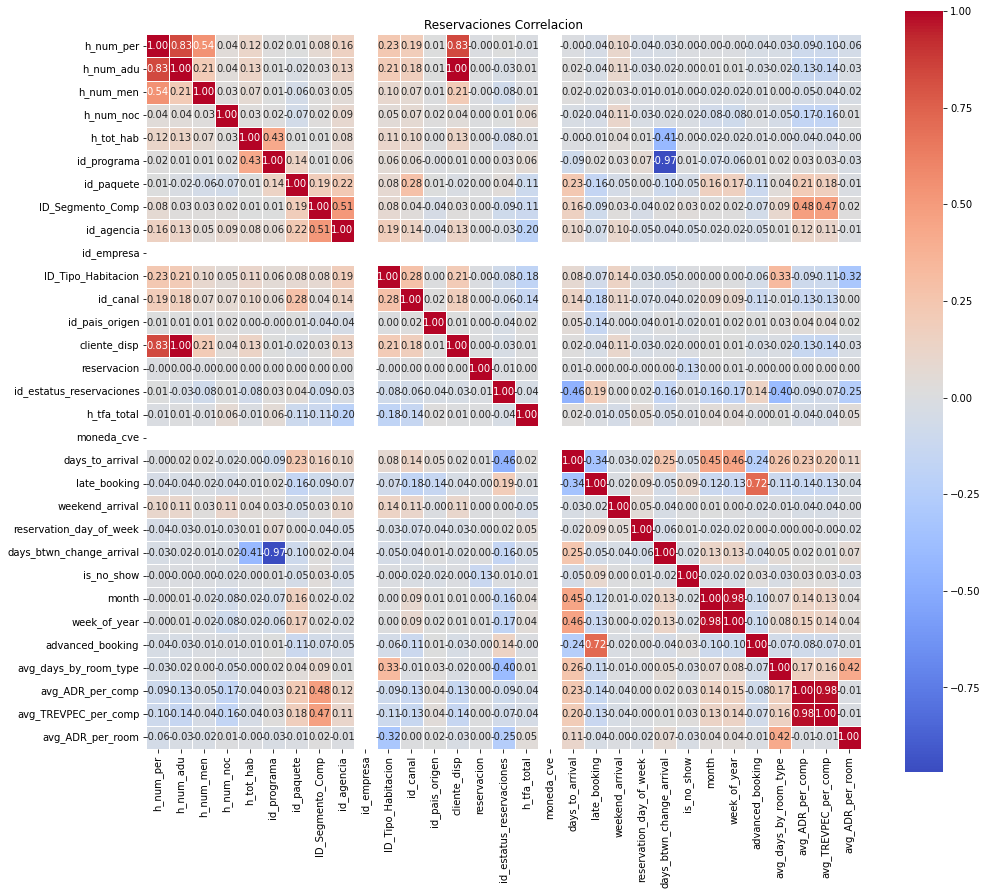

In [93]:
corr_resv = df_resv.corr(numeric_only=True)
plt.figure(figsize=(16, 14))
sns.heatmap(corr_resv, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Reservaciones Correlacion')
plt.show()

# MODELO

In [127]:
df_reservaciones = df_resv


In [146]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Supongamos que df es tu DataFrame

# Mezclar los datos
df_reservaciones = shuffle(df_resv, random_state=42)
drop_columns=['days_btwn_change_arrival','reservacion',
              'is_no_show','fecha_hoy','h_res_fec','h_res_fec_ok','h_fec_lld','h_fec_lld_ok',
              'h_fec_reg_ok','h_fec_sda_ok','h_ult_cam_fec_ok']
# Dividir los datos en conjuntos de entrenamiento y prueba con estratificación
X = df_reservaciones.drop(drop_columns, axis=1)  # Asume que 'reservacion' es tu columna objetivo
y = df_reservaciones['is_no_show']





In [147]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the undersampler
rus = RandomUnderSampler( random_state=42)

# Resample the data
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the balance
print(pd.Series(y_resampled).value_counts())  # Outputs the counts of each class to confirm balance


is_no_show
0    2167
1    2167
Name: count, dtype: int64


In [148]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    stratify=y_resampled,  # This should match y_resampled
    random_state=42
)

# Verify class distribution in the train and test sets
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))
print("Test set class distribution:")
print(y_test.value_counts(normalize=True))

Training set class distribution:
is_no_show
1    0.500144
0    0.499856
Name: proportion, dtype: float64
Test set class distribution:
is_no_show
0    0.500577
1    0.499423
Name: proportion, dtype: float64


In [149]:
from keras.models import Sequential
model = Sequential()
model.add(Dense(10, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [150]:
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2)
model.summary()
     

Epoch 1/300
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4991 - loss: 186.0848 - val_accuracy: 0.5490 - val_loss: 14.2450
Epoch 2/300
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5478 - loss: 10.3276 - val_accuracy: 0.5548 - val_loss: 8.2569
Epoch 3/300
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5341 - loss: 7.0686 - val_accuracy: 0.5663 - val_loss: 6.7084
Epoch 4/300
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5482 - loss: 5.5408 - val_accuracy: 0.5591 - val_loss: 5.3660
Epoch 5/300
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5439 - loss: 5.2891 - val_accuracy: 0.5562 - val_loss: 5.4363
Epoch 6/300
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5376 - loss: 5.2287 - val_accuracy: 0.5072 - val_loss: 5.6262
Epoch 7/300
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5422 - loss: 3.5866 - val_accuracy: 0.5706 - val_loss: 4.1220
Epoch 8/300
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5597 - loss: 3.0965 - val_accuracy: 0.5850

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │           290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,565 (6.12 KB)

 Trainable params: 521 (2.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,044 (4.08 KB)

In [151]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'
val_lowest

0.5146834254264832

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R2 Score= -0.2410627813667372
Accurcy= 0.6897347174163783


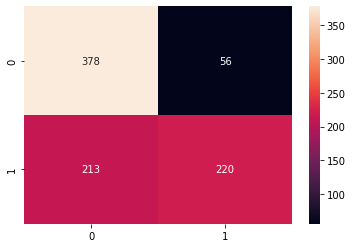

In [152]:
from sklearn.metrics import r2_score,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )
Accurcy = accuracy_score(y_test, y_pred)
print("Accurcy=",Accurcy )


conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True, fmt='d')
plt.show()
     

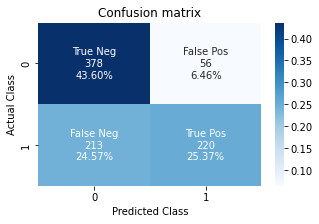

In [153]:
# Define a function to plot the confusion matrix as a heatmap
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2 , v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.subplots(figsize = (5,3))
    ax = sns.heatmap(cm/np.sum(cm), annot=labels, fmt="", cmap='Blues')
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('Actual Class')
    ax.set_title(f'Confusion matrix')
    plt.show()
    
    
    
# Plot the confusion matrix as a heatmap
plot_confusion_matrix(y_test, y_pred)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step
AUC Score= 0.7268494375325932
R2 Score= -0.2410627813667372
Accuracy= 0.6897347174163783


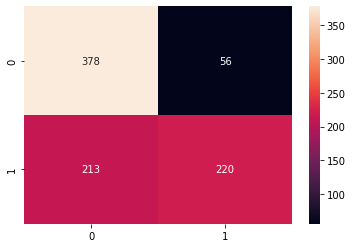

In [154]:
from sklearn.metrics import roc_auc_score

# Use model.predict() to get the prediction probabilities for the positive class
y_probs = model.predict(X_test)  # This assumes the output is the probability of the positive class

# If your model outputs a probability in a different format, adjust indices accordingly
# For example, if it's multi-class classification, you might need to select a specific column:
# y_probs = model.predict(X_test)[:, 1]  # Assuming the second column is for class '1'

# Compute AUC
auc = roc_auc_score(y_test, y_probs)
print("AUC Score=", auc)

# Other metrics and plots as before
R2 = r2_score(y_test, (y_probs > 0.5).astype(int))  # Convert probabilities to binary predictions
print("R2 Score=", R2)
Accuracy = accuracy_score(y_test, (y_probs > 0.5).astype(int))
print("Accuracy=", Accuracy)

conf_matrix = confusion_matrix(y_test, (y_probs > 0.5).astype(int))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()


In [68]:
pip install shap

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:

import numpy as np

# Load JS visualization code to the notebook
shap.initjs()

# Create a SHAP Deep Explainer to explain predictions of the model
# Here, X_train[:100] can be considered as a background dataset to approximate the distributions of features
explainer = shap.DeepExplainer(model, X_train[:100])

# Compute SHAP values for a subset of your test set
shap_values = explainer.shap_values(X_test[:10])

# Visualize the first prediction's explanation
# For multi-class outputs, you need to adjust the index accordingly
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[0])


In [ ]:
import shap

# Create a background dataset (can be a subset of the training data)
explainer = shap.DeepExplainer(model, X_train[:100])

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test[:10])

# Plot the SHAP values for the first prediction
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[0])


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df_features' with 'Features' and 'Importance' columns
df_features = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Features', data=df_features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


AttributeError: 'Sequential' object has no attribute 'feature_importances_'

  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Owner\\anaconda3\\Lib\\site-packages\\~3mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [155]:
# Directly using y_pred as probabilities if they represent the probability of the positive class
auc = roc_auc_score(y_test, y_pred.astype(float))  # Ensure it's float for AUC computation
print("AUC Score=", auc)


AUC Score= 0.6895254414065409


In [47]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from kerastuner import Objective
import keras_tuner as kt

In [156]:
def build_model(hp):
    model_tuner = Sequential()
    for i in range(hp.Int('num_layers', 2, 10)):
        model_tuner.add(Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
    model_tuner.add(Dense(1, activation='sigmoid'))
    model_tuner.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model_tuner


tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,
    executions_per_trial=2,
    directory='my_dir',
    project_name='churn_classification')


tuner.search_space_summary()

Reloading Tuner from my_dir\churn_classification\tuner0.json
Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}


In [157]:
tuner.search(X_train, y_train, epochs=500, validation_split=0.2)
     

In [158]:
best_model = tuner.get_best_models(num_models=1)[0]
input_shape = X_train.shape[1:]
best_model.build(input_shape=(None, *input_shape))
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 480)            │       123,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        15,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146,209 (571.13 KB)

 Trainable params: 146,209 (571.13 KB)

 Non-trainable params: 0 (0.00 B)

In [159]:
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6267 - loss: 1.4200
Test Accuracy: 0.6574394702911377


In [160]:
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)
     


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [161]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.657439446366782
[[322 112]
 [185 248]]
              precision    recall  f1-score   support

           0       0.64      0.74      0.68       434
           1       0.69      0.57      0.63       433

    accuracy                           0.66       867
   macro avg       0.66      0.66      0.65       867
weighted avg       0.66      0.66      0.65       867



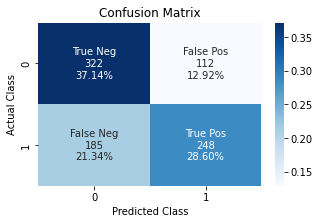

In [162]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2 , v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.subplots(figsize = (5,3))
    ax = sns.heatmap(cm/np.sum(cm), annot=labels, fmt="", cmap='Blues')
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('Actual Class')
    ax.set_title(f'Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

# RANDOM FOREST

In [279]:
selected_features = ['id_estatus_reservaciones','days_to_arrival','late_booking',
                        'reservation_day_of_week','id_paquete','ID_Segmento_Comp','week_of_year', 'h_tfa_total','month']

categorical_features = ['reservation_day_of_week', 'id_estatus_reservaciones',
                        'late_booking','id_paquete','ID_Segmento_Comp','month',
                        'week_of_year']


numerical_features = ['days_to_arrival', 'h_tfa_total']

In [280]:
# Mezclar los datos
df_reservaciones = shuffle(df_resv, random_state=42)
X = df_reservaciones[selected_features]  # Asume que 'reservacion' es tu columna objetivo
y = df_reservaciones['is_no_show']

In [281]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the undersampler
rus = RandomUnderSampler( random_state=42)

# Resample the data
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the balance
print(pd.Series(y_resampled).value_counts())  # Outputs the counts of each class to confirm balance

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    stratify=y_resampled,  # This should match y_resampled
    random_state=42
)

# Verify class distribution in the train and test sets
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))
print("Test set class distribution:")
print(y_test.value_counts(normalize=True))

is_no_show
0    1454
1    1454
Name: count, dtype: int64
Training set class distribution:
is_no_show
1    0.5
0    0.5
Name: proportion, dtype: float64
Test set class distribution:
is_no_show
1    0.5
0    0.5
Name: proportion, dtype: float64


In [285]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Entrenar modelo
model = RandomForestClassifier(random_state=42,  n_estimators=100, max_depth=10,max_features='sqrt',verbose=1)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s


Accuracy: 0.9851451480115975
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27522
           1       0.00      0.00      0.00       415

    accuracy                           0.99     27937
   macro avg       0.49      0.50      0.50     27937
weighted avg       0.97      0.99      0.98     27937



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


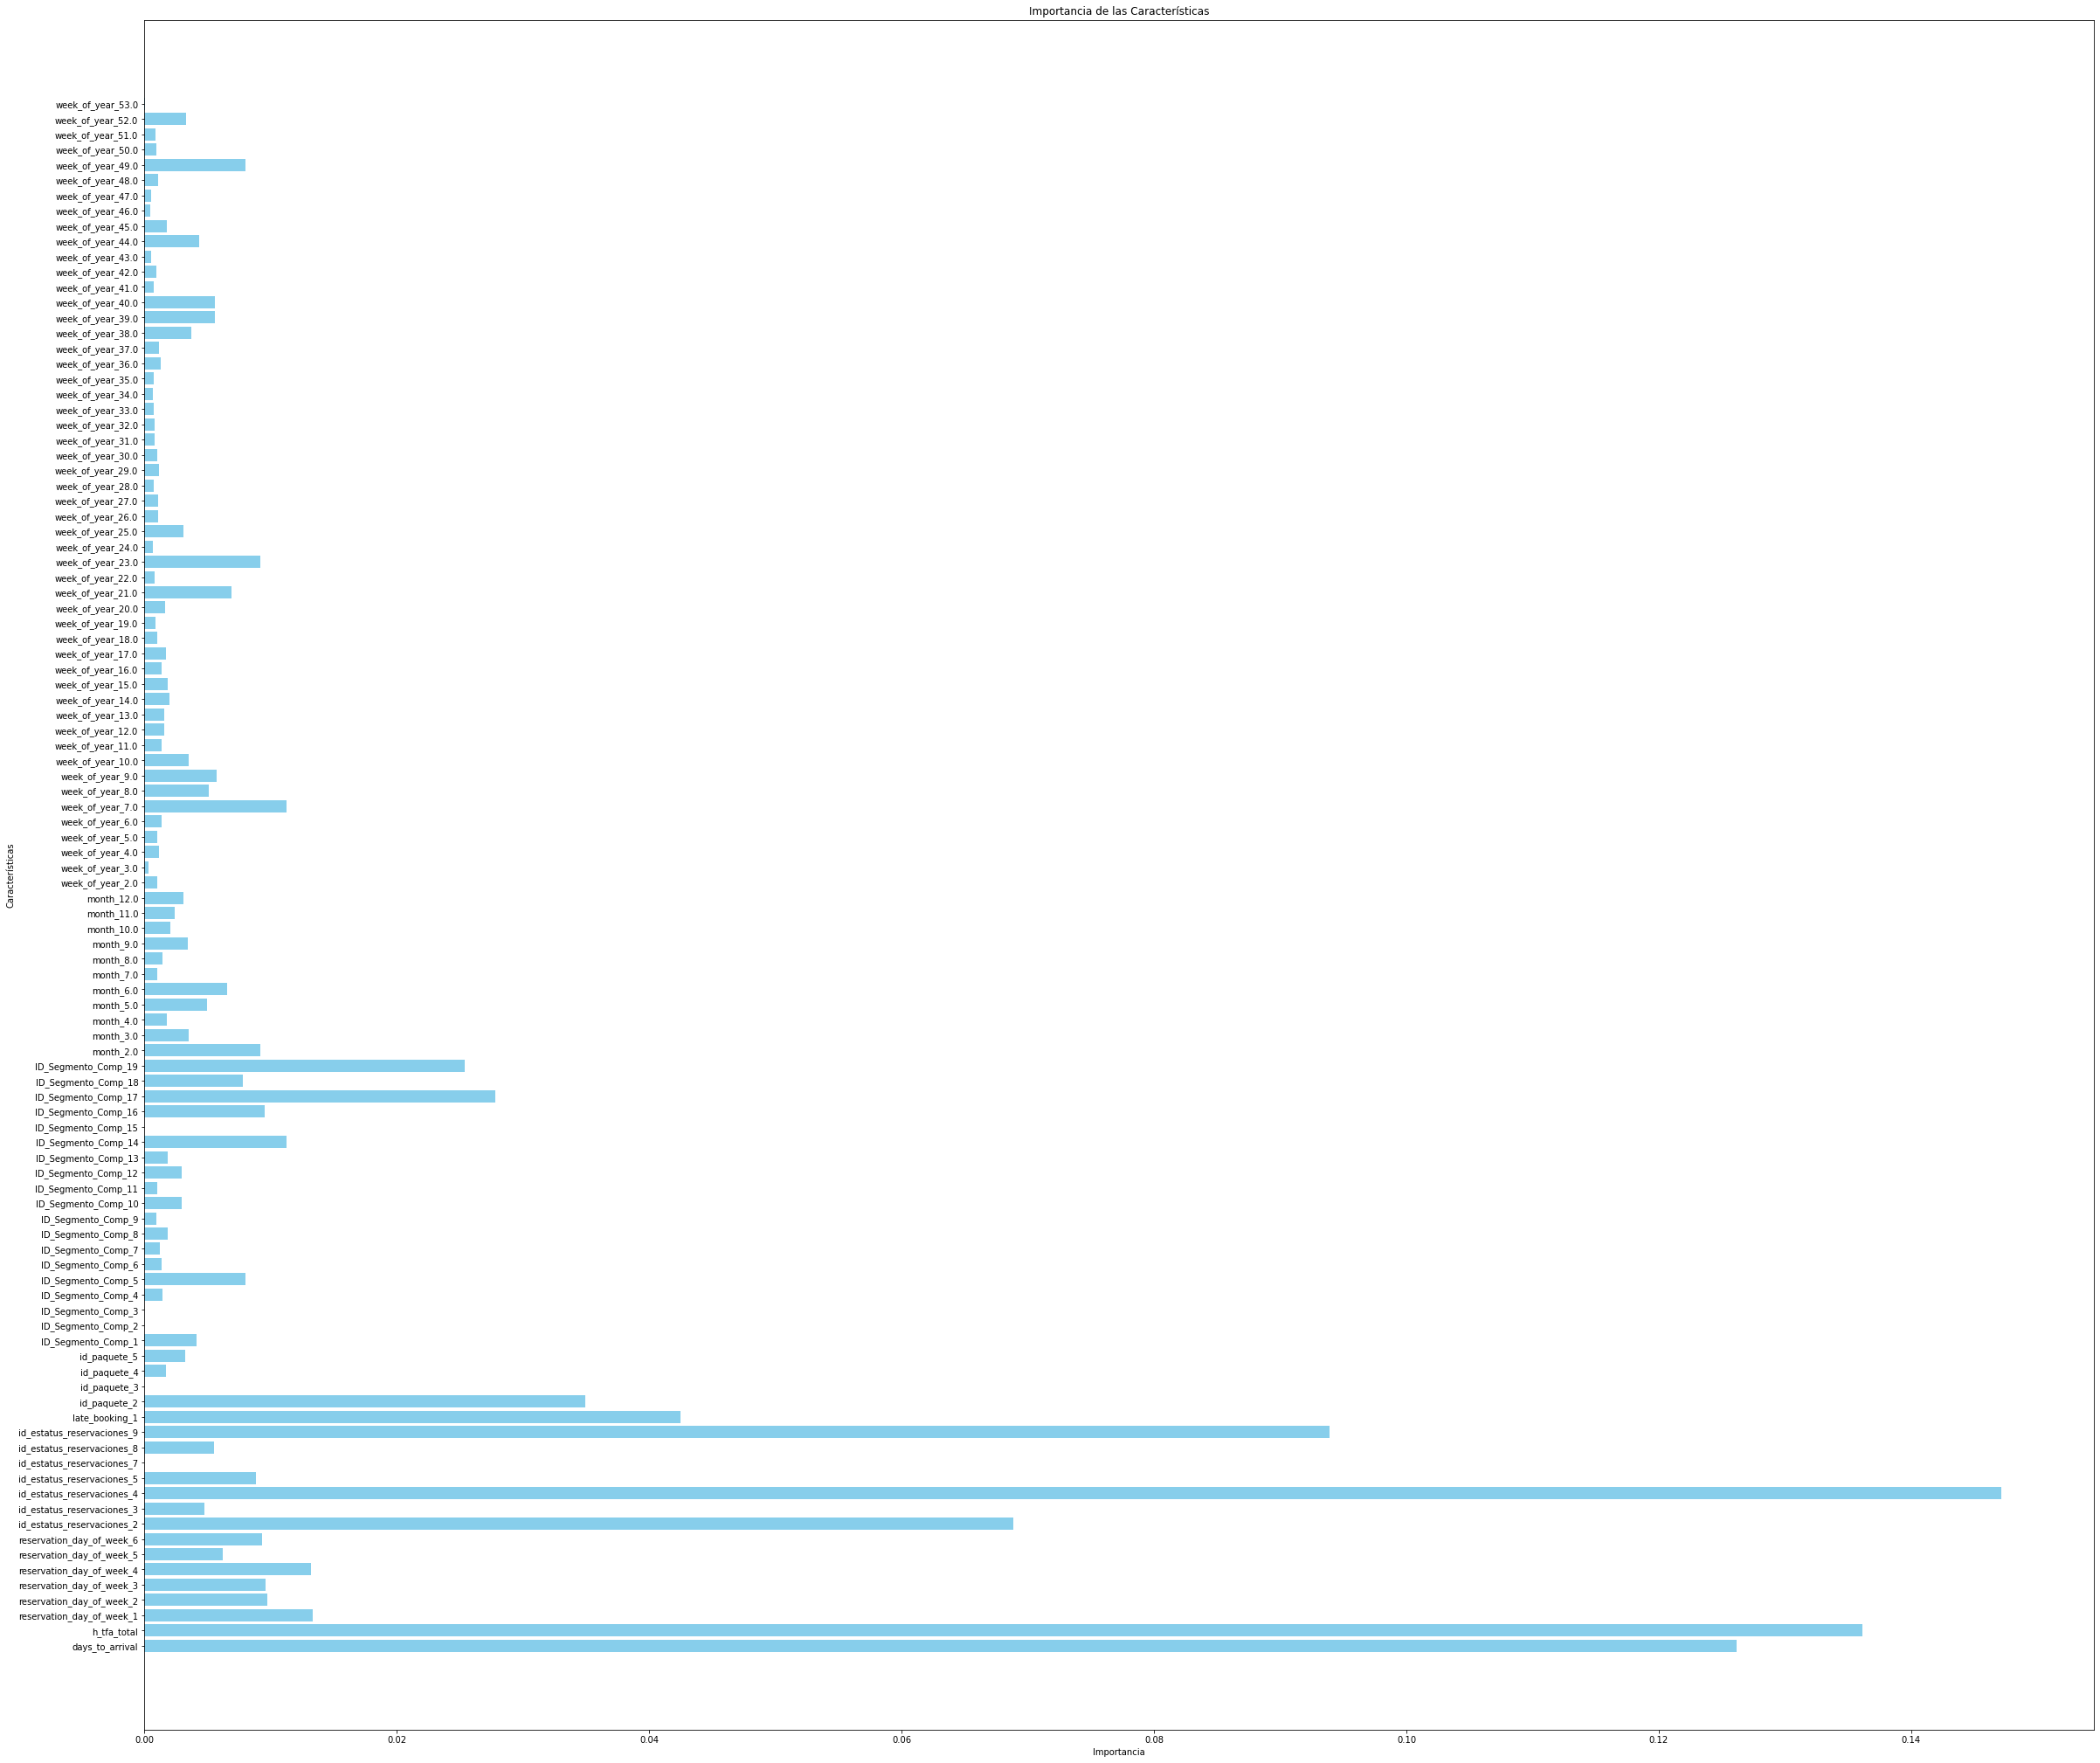

In [286]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener importancias de características
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out())
importances = model.feature_importances_

# Crear gráfico
plt.figure(figsize=(40, 36))
plt.barh(feature_names, importances, color='skyblue')
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


In [275]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener importancias de características
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out())
importances = model.feature_importances_

# Crear gráfico
plt.figure(figsize=(40, 36))
plt.barh(feature_names, importances, color='skyblue')
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

KeyError: 'cat'

In [267]:
pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])
# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the pipeline
accuracy = pipeline.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8591065292096219


In [282]:
# Seleccionar características relevantes


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Pipeline para preprocesar
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Preprocesar los datos
X_preprocessed = preprocessor.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

print("Tamaño de los datos de entrenamiento:", X_train.shape)
print("Tamaño de los datos de prueba:", X_test.shape)

Tamaño de los datos de entrenamiento: (111748, 102)
Tamaño de los datos de prueba: (27937, 102)


In [283]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a fitted pipeline
# Evaluate the pipeline on the test data
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Print the classification report
print(classification_report(y_test, y_pred))

# Generate and display a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted No-Show', 'Predicted Show'], yticklabels=['Actual No-Show', 'Actual Show'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance (for models that support this like RandomForest)
if 'RandomForestClassifier' in str(pipeline.named_steps['classifier']):
    importances = pipeline.named_steps['classifier'].feature_importances_
    features = X_train.columns
    indices = np.argsort(importances)[::-1]
    
    # Plot Feature Importance
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
    plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

ValueError: X has 102 features, but RandomForestClassifier is expecting 28 features as input.

# INTENTOS - DIDNT USE SCALER

In [163]:
selected_features = ['id_estatus_reservaciones','days_to_arrival','late_booking',
                        'reservation_day_of_week','weekend_arrival','id_paquete','ID_Segmento_Comp',
                     'id_agencia','id_empresa','ID_Tipo_Habitacion','month','week_of_year',
                     'advanced_booking','h_num_per','h_num_adu','h_num_men','h_num_noc','h_tot_hab', 'h_tfa_total', 
                     'avg_ADR_per_comp','avg_TREVPEC_per_comp','avg_ADR_per_room']

categorical_features = ['reservation_day_of_week', 'id_estatus_reservaciones',
                        'late_booking','weekend_arrival','id_paquete','ID_Segmento_Comp','id_agencia',
                        'id_empresa','ID_Tipo_Habitacion','month','week_of_year','advanced_booking']


numerical_features = ['days_to_arrival','h_num_per','h_num_adu','h_num_men',
                        'h_num_noc','h_tot_hab', 'h_tfa_total','avg_ADR_per_comp','avg_TREVPEC_per_comp','avg_ADR_per_room']


In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# Define the model builder function
def create_model():
    model = Sequential([
        # Ensure the input shape is correctly defined for your data
        Dense(64, activation='relu', input_shape=(input_shape,)),  # `input_shape` should match the number of features after preprocessing
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

column_transformer = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), ['numerical_column']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['categorical_column'])
    ],
    remainder='passthrough'
)
# Prepare data
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Preprocess the data and find out the input shape
X_train_transformed = preprocessor.fit_transform(X_train)
input_shape = X_train_transformed.shape[1]  # This gives the number of input features after transformation

# Create a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KerasClassifier(model=create_model, epochs=50, batch_size=32, verbose=1))
])


In [216]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Define preprocessing for numerical data: scaling
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical data: one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the preprocessing engine
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Now you can integrate this `preprocessor` into a full model pipeline if desired


In [ ]:
drop_columns=['days_btwn_change_arrival','days_since_last_change','reservacion',
              'is_no_show','fecha_hoy','h_res_fec','h_res_fec_ok','h_fec_lld','h_fec_lld_ok',
              'h_fec_reg_ok','h_fec_sda_ok','h_ult_cam_fec_ok']
# Dividir los datos en conjuntos de entrenamiento y prueba con estratificación
X = df_reservaciones.drop(drop_columns, axis=1)  # Asume que 'reservacion' es tu columna objetivo
y = df_reservaciones['is_no_show']

In [185]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Supongamos que df es tu DataFrame

# Mezclar los datos
df_reservaciones = shuffle(df_resv, random_state=42)
drop_columns=['days_btwn_change_arrival','reservacion',
              'is_no_show','fecha_hoy','h_res_fec','h_res_fec_ok','h_fec_lld','h_fec_lld_ok',
              'h_fec_reg_ok','h_fec_sda_ok','h_ult_cam_fec_ok']
# Dividir los datos en conjuntos de entrenamiento y prueba con estratificación
X = df_reservaciones.drop(drop_columns, axis=1)  # Asume que 'reservacion' es tu columna objetivo
X=X.dropna()
y = df_reservaciones['is_no_show']

y = y.loc[X.index]

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the undersampler
rus = RandomUnderSampler( random_state=42)

# Resample the data
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the balance
print(pd.Series(y_resampled).value_counts())  # Outputs the counts of each class to confirm balance

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    stratify=y_resampled,  # This should match y_resampled
    random_state=42
)

# Verify class distribution in the train and test sets
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))
print("Test set class distribution:")
print(y_test.value_counts(normalize=True))

is_no_show
0    1454
1    1454
Name: count, dtype: int64
Training set class distribution:
is_no_show
1    0.5
0    0.5
Name: proportion, dtype: float64
Test set class distribution:
is_no_show
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Assuming 'OneHotEncoder' is part of a column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Assuming column 4 is categorical
    ],
    remainder='passthrough'
)

# Integrate this into your pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier  # Example classifier

pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', RandomForestClassifier())
])
# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the pipeline
accuracy = pipeline.score(X_test, y_test)
print("Test Accuracy:", accuracy)

In [234]:
# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the pipeline
accuracy = pipeline.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8625429553264605


In [237]:
# Assuming the last step of the pipeline is the RandomForestClassifier
feature_importances = pipeline.named_steps['classifier'].feature_importances_


Test Accuracy: 0.8625429553264605
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       291
           1       0.87      0.85      0.86       291

    accuracy                           0.86       582
   macro avg       0.86      0.86      0.86       582
weighted avg       0.86      0.86      0.86       582



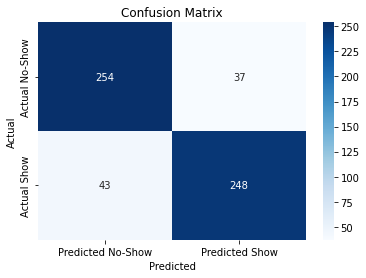

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (28,) and arg 1 with shape (242,).

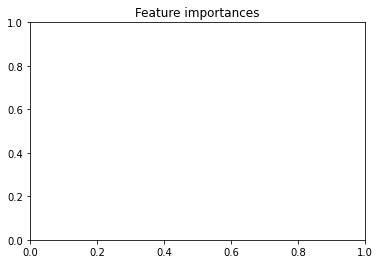

In [242]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a fitted pipeline
# Evaluate the pipeline on the test data
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Print the classification report
print(classification_report(y_test, y_pred))

# Generate and display a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted No-Show', 'Predicted Show'], yticklabels=['Actual No-Show', 'Actual Show'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance (for models that support this like RandomForest)
if 'RandomForestClassifier' in str(pipeline.named_steps['classifier']):
    importances = pipeline.named_steps['classifier'].feature_importances_
    features = X_train.columns
    indices = np.argsort(importances)[::-1]
    
    # Plot Feature Importance
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
    plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()


In [243]:
from sklearn.utils import estimator_html_repr

def get_feature_names(column_transformer):
    feature_names = []

    # Loop through each transformer within the ColumnTransformer
    for transformer_name, transformer, orig_feature_names in column_transformer.transformers_:
        if transformer_name == 'remainder':
            if transformer == 'drop':
                continue
            elif transformer == 'passthrough':
                feature_names.extend(orig_feature_names if isinstance(orig_feature_names, list) else [orig_feature_names])
            continue

        if hasattr(transformer, 'get_feature_names_out'):
            # Use get_feature_names_out if available
            if isinstance(orig_feature_names, list):
                transformer_feature_names = transformer.get_feature_names_out(orig_feature_names)
            else:
                transformer_feature_names = transformer.get_feature_names_out()
            feature_names.extend(transformer_feature_names)
        else:
            # If no method available, use a simple approach
            feature_names.extend([f"{transformer_name}__{f}" for f in orig_feature_names])

    return feature_names

# Apply the function to your column transformer
feature_names = get_feature_names(pipeline.named_steps['preprocessor'])
print("Extracted feature names:", feature_names)






Extracted feature names: ['days_to_arrival', 'h_num_per', 'h_num_adu', 'h_num_men', 'h_num_noc', 'h_tot_hab', 'h_tfa_total', 'avg_ADR_per_comp', 'avg_TREVPEC_per_comp', 'avg_ADR_per_room', 'reservation_day_of_week_0', 'reservation_day_of_week_1', 'reservation_day_of_week_2', 'reservation_day_of_week_3', 'reservation_day_of_week_4', 'reservation_day_of_week_5', 'reservation_day_of_week_6', 'id_estatus_reservaciones_1', 'id_estatus_reservaciones_2', 'id_estatus_reservaciones_3', 'id_estatus_reservaciones_4', 'id_estatus_reservaciones_5', 'id_estatus_reservaciones_8', 'id_estatus_reservaciones_9', 'late_booking_0', 'late_booking_1', 'weekend_arrival_0', 'weekend_arrival_1', 'id_paquete_1', 'id_paquete_2', 'id_paquete_5', 'ID_Segmento_Comp_0', 'ID_Segmento_Comp_1', 'ID_Segmento_Comp_4', 'ID_Segmento_Comp_5', 'ID_Segmento_Comp_6', 'ID_Segmento_Comp_7', 'ID_Segmento_Comp_8', 'ID_Segmento_Comp_9', 'ID_Segmento_Comp_10', 'ID_Segmento_Comp_11', 'ID_Segmento_Comp_12', 'ID_Segmento_Comp_13', 'ID_

In [249]:
import pandas as pd

# Create a DataFrame with the feature importances
feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Display the feature importances sorted by importance
print(feat_importances.sort_values(by='Importance', ascending=False))


ValueError: All arrays must be of the same length

In [250]:
import pandas as pd

# Create a DataFrame with the feature importances
feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Display the feature importances sorted by importance
print(feat_importances.sort_values(by='Importance', ascending=False))


ValueError: All arrays must be of the same length

In [251]:
import matplotlib.pyplot as plt

# Sort features by importance
feat_importances_sorted = feat_importances.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(feat_importances_sorted['Feature'], feat_importances_sorted['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()


NameError: name 'feat_importances' is not defined

In [252]:
# Get feature importances from the classifier
feature_importances = pipeline.named_steps['classifier'].feature_importances_
def get_feature_names(transformer, input_features=None):
    """
    Given a transformer and the list of input feature names, return a list of output feature names.
    """
    output_features = []

    # Handle different transformer types
    if hasattr(transformer, 'get_feature_names_out'):
        if input_features is not None:
            output_features.extend(transformer.get_feature_names_out(input_features))
        else:
            output_features.extend(transformer.get_feature_names_out())
    elif hasattr(transformer, 'features_'):
        output_features.extend(transformer.features_)
    else:
        output_features.extend(input_features)

    return output_features

# Apply this function to each part of the column transformer
feature_names = []
for name, trans, column, in column_transformer.transformers_:
    if trans == 'passthrough':
        feature_names.extend(column)
    elif trans != 'drop':
        names = get_feature_names(trans, column)
        feature_names.extend(names)


ValueError: input_features is not equal to feature_names_in_

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       291
           1       0.86      0.86      0.86       291

    accuracy                           0.86       582
   macro avg       0.86      0.86      0.86       582
weighted avg       0.86      0.86      0.86       582

Confusion Matrix:


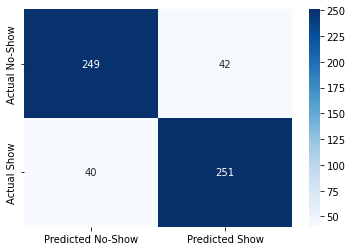

In [194]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a pipeline with SMOTE and a classifier
pipeline = IMBPipeline([
    ('smote', SMOTE(random_state=42)),  # Oversample the minority class
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Split your data into training and testing set if not already done

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the predictions
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted No-Show', 'Predicted Show'], yticklabels=['Actual No-Show', 'Actual Show'])
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set size:", X_train.shape, "Test set size:", X_test.shape)

In [197]:
# Check correlations for each numerical feature with the target if it's encoded numerically
correlations = df_resv[numerical_features].corrwith(y)
print(correlations)

days_to_arrival        -0.054308
h_num_per               0.008363
h_num_adu                    NaN
h_num_men                    NaN
h_num_noc              -0.064494
h_tot_hab                    NaN
h_tfa_total            -0.028385
avg_ADR_per_comp        0.031562
avg_TREVPEC_per_comp    0.031586
avg_ADR_per_room       -0.024129
dtype: float64


In [199]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit and evaluate
rf_pipeline.fit(X_train, y_train)
print("Test Accuracy:", rf_pipeline.score(X_test, y_test))


ValueError: Found unknown categories [3] in column 4 during transform

In [200]:
from keras.models import Sequential
from keras.regularizers import l2

model = Sequential()
model.add(Dense(10, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(10, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [201]:
from keras.callbacks import EarlyStopping

# Setup early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model with early stopping
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stop])
model.summary()

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4903 - loss: 375.3870 - val_accuracy: 0.5365 - val_loss: 145.8416
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4803 - loss: 101.1699 - val_accuracy: 0.4120 - val_loss: 16.1826
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4540 - loss: 12.4384 - val_accuracy: 0.4571 - val_loss: 6.8761
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5081 - loss: 5.3138 - val_accuracy: 0.6288 - val_loss: 2.1776
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6046 - loss: 2.2994 - val_accuracy: 0.6094 - val_loss: 1.6128
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6055 - loss: 1.9263 - val_accuracy: 0.6438 - val_loss: 1.4061
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6316 - loss: 1.2883 - val_accuracy: 0.6116 - val_loss: 1.2898
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5988 - loss: 1.1609 - val_accuracy: 0.6180 - v

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 10)             │           290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,235 (4.83 KB)

 Trainable params: 411 (1.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 824 (3.22 KB)